In [1]:
import numpy as np
import sklearn.feature_selection
import matplotlib.pyplot as plt

from src.features.graph_statistics import Stats
from src.random.bernoulli import RandomGraph

/usr/local/lib/python3.6/site-packages/graspy-0.0.1-py3.6.egg/graspy/plot/__init__.py:6: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/local/Cellar/python/3.6.4_3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python/3.6.4_3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/

In [2]:
X = []
y = np.zeros(50)

# 70% chance of connection = 1
for i in range(25):
    g = RandomGraph(30, 0.7)
    gs = Stats(g)
    stats = np.array(gs.return_stats())
    X.append(stats)
    y[i] = 1
    
# 30% chance of connection = 0
for j in range(25,50):
    g = RandomGraph(30, 0.3)
    gs = Stats(g)
    stats = np.array(gs.return_stats())
    X.append(stats)
    y[i] = 0
    
X = np.matrix(X)

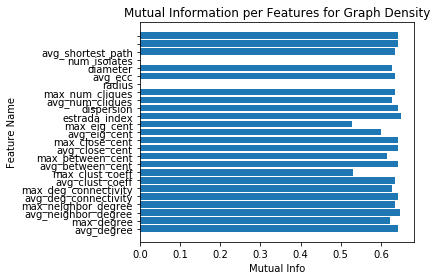

In [3]:
mi = sklearn.feature_selection.mutual_info_classif(X, y)

labels =["avg_degree", 
        "max_degree",
        "avg_neighbor_degree",
        "max_neighbor_degree",
        "avg_deg_connectivity",
        "max_deg_connectivity",
        "avg_clust_coeff",
        "max_clust_coeff",
        "avg_between_cent",
        "max_between_cent",
        "avg_close_cent",
        "max_close_cent",
        "avg_eig_cent",
        "max_eig_cent",
        "estrada_index",
        "dispersion",
        "avg_num_cliques",
        "max_num_cliques",
        "radius",
        "avg_ecc",
        "diameter",
        "num_isolates",
        "avg_shortest_path"]

plt.figure()
plt.barh(range(mi.shape[0]), mi, align="center")
plt.yticks(range(mi.shape[0]), labels)
plt.title("Mutual Information per Features for Graph Density")
plt.xlabel("Mutual Info")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.savefig("mutual_info_rand_graph.png", dpi=400)
plt.show()
